# Rapport Finale projet math-info

[Repositoire du projet](https://github.com/MK8BK/projet_labyrinthe/)

## Auteurs

| Nom  | Prénom | Courriel | Groupe | Github |
| :-------------: | :-------------: | :-------------: | :-------------: | :-------------: |
| AIT BELKACEM  | Moncef Karim  | moncef.ait-belkacem@universite-paris-saclay.fr  | LDDIM2  |[MK8BK](https://github.com/MK8BK)|
| LABOURET | Lucas | lucas.labouret@universite-paris-saclay.fr  | LDDIM2  |[Lucas-Labouret](https://github.com/Lucas-Labouret)|


<br><br><br><br>

##| AMADI | Bilal | bilal.amadi@universite-paris-saclay.fr  | LDDIM2  |[bilaldjoss](https://github.com/bilaldjoss)|


## Introduction


Ceci est le rapport final de l'UE "Projet Math-informatique" en L1 LDDIM à l'université Paris-Saclay.

Le but de cette UE est de découvrir la démarche de modélisation d'un problème scientifique grâce à l'outil informatique.


## Sujet


Nous avons choisi le sujet [Labyrinthe](https://github.com/MK8BK/projet_labyrinthe/blob/master/projet_Labyrinthe.pdf).

In [1]:
from PIL.Image import open

## 1.  Étude théorique du problème

### Questions

<img src="data/docs/sujetP1.png"/>

### Réponses


#### Définitions


On représente un labyrinthe de deux manières :

- Une grille de n × m cases séparées ou non par des murs
- Un graphe de n × m nœuds connectés ou non par des arrêtes


#### Question 1.1.

##### 1.1.1. Pseudo-labyrinthes de taille 2×2

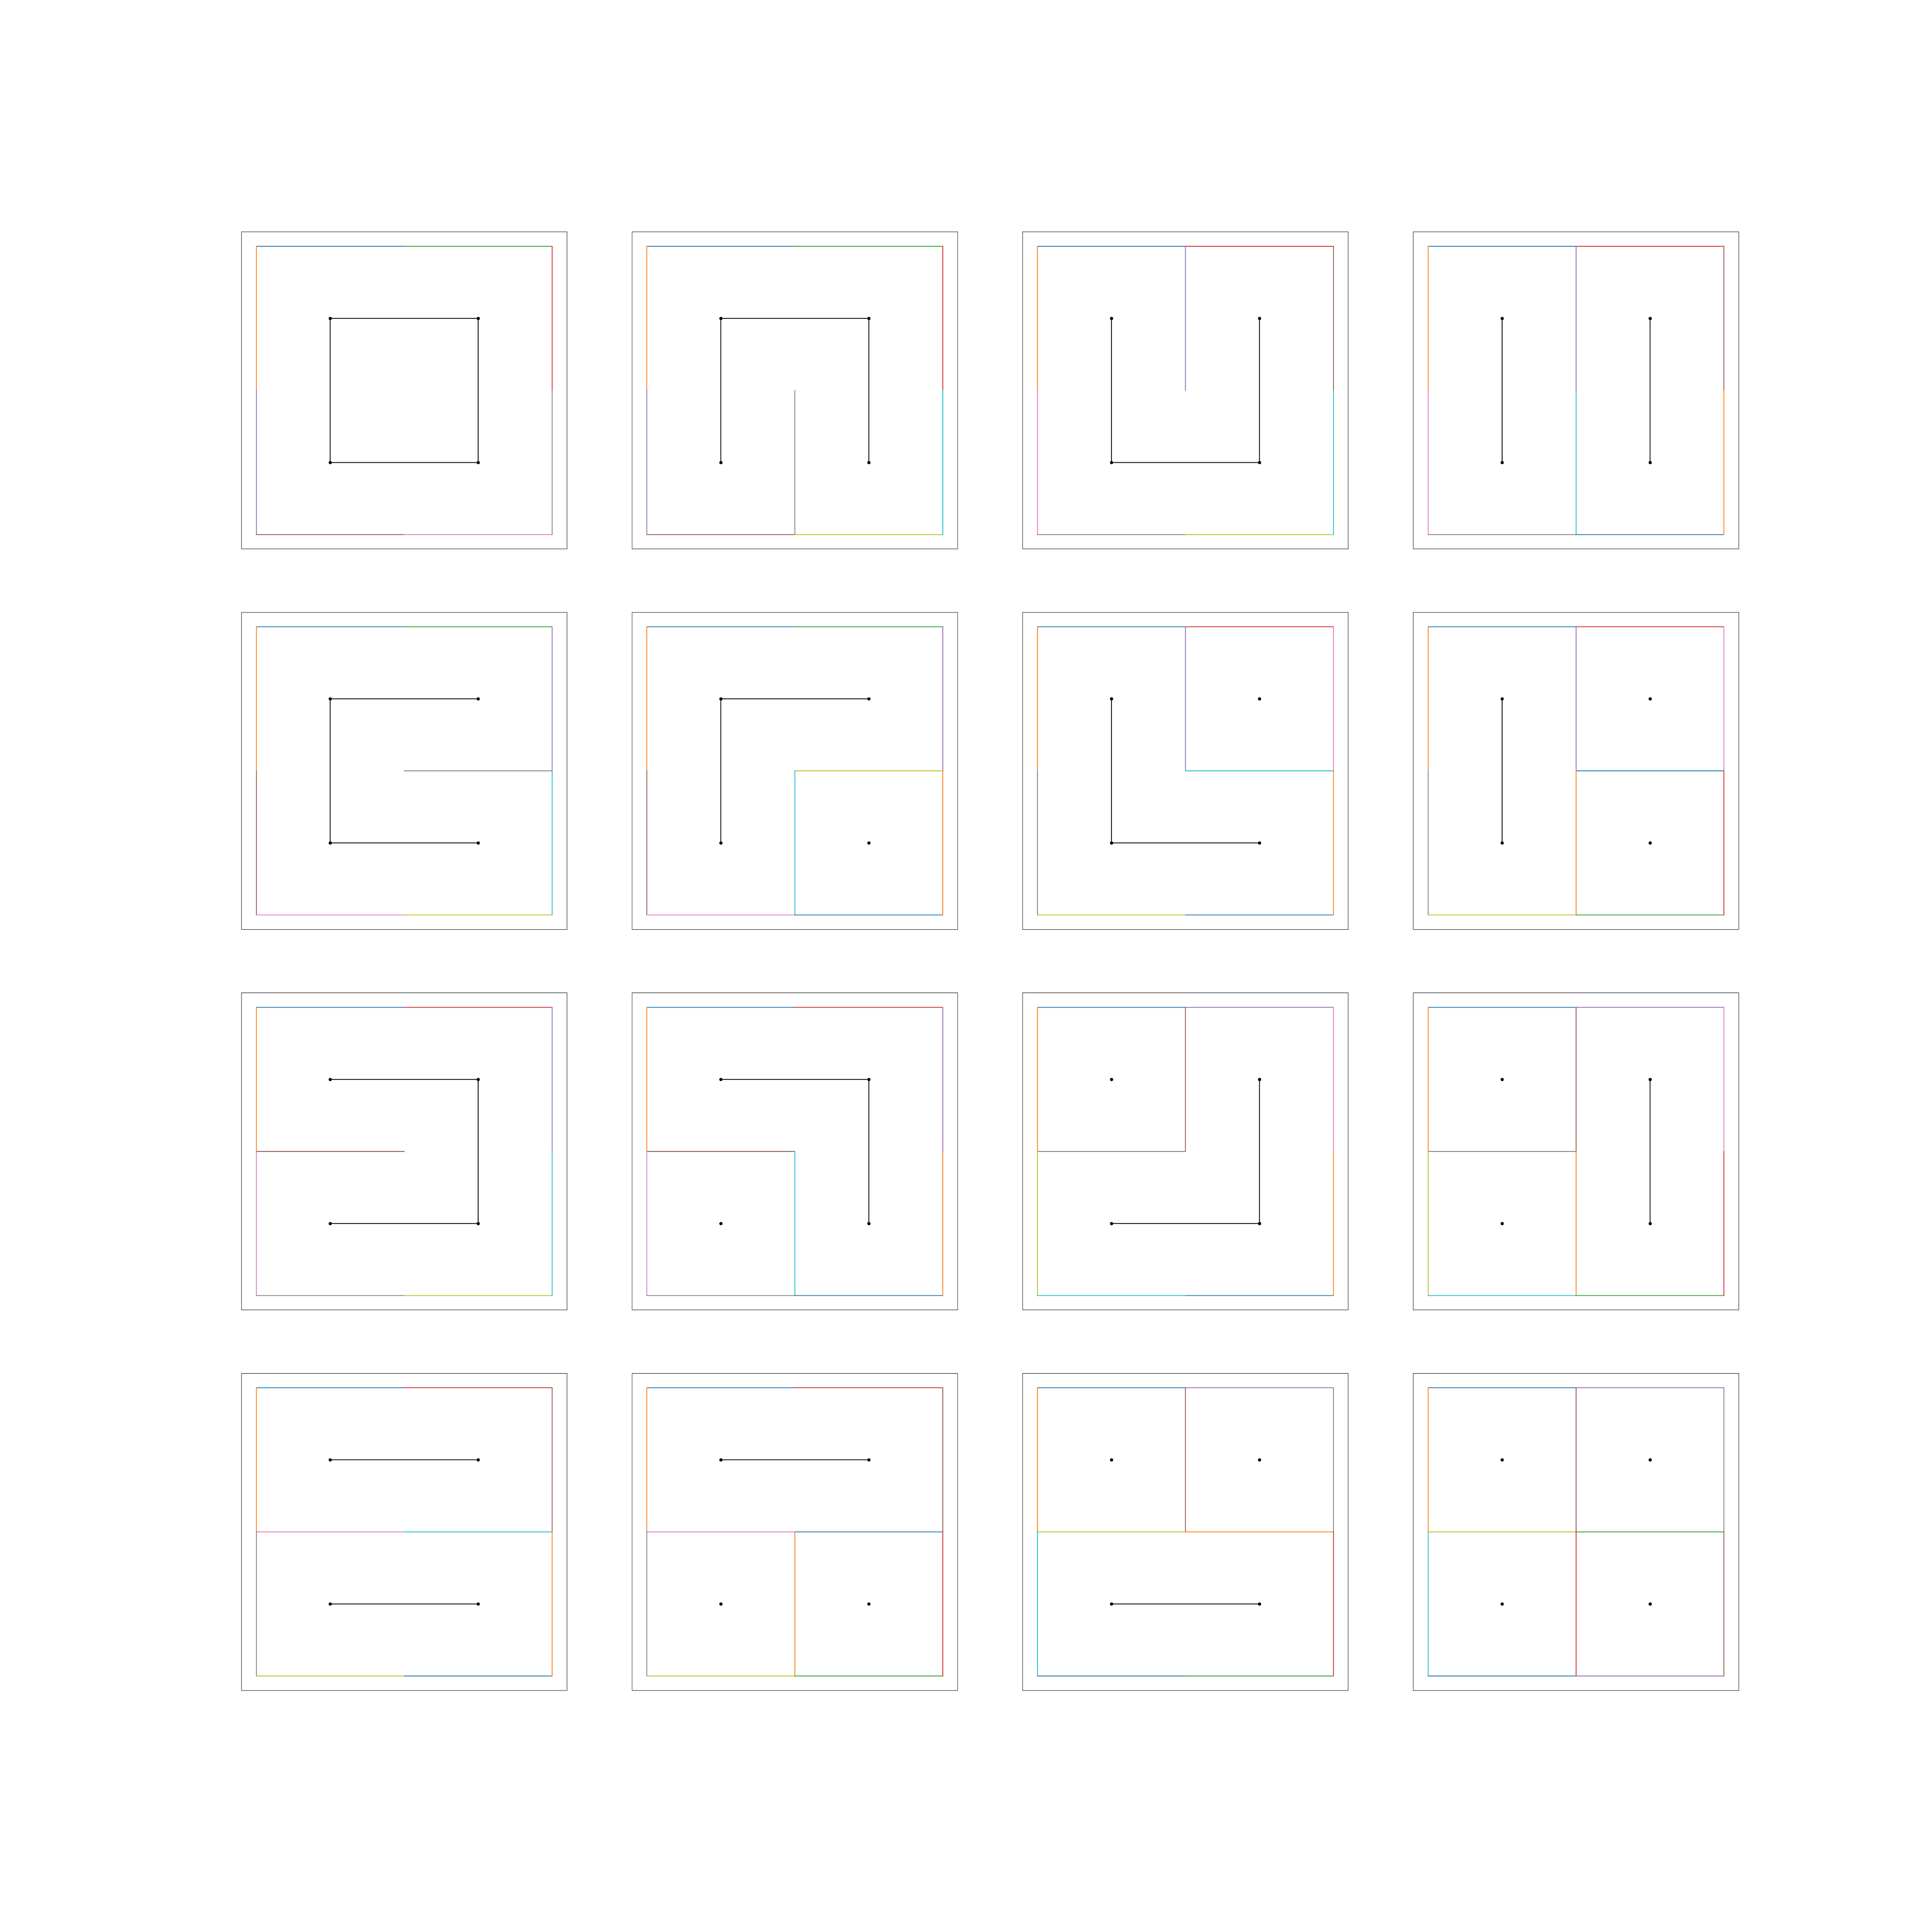

In [2]:
open("data/2x2/TotalSmall.png")

##### 1.1.2. Labyrinthes de taille 2×2

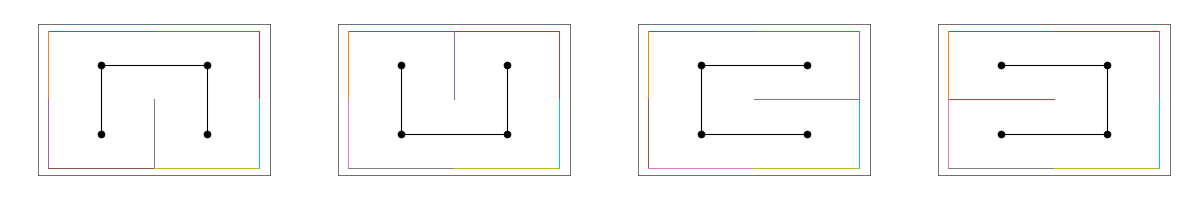

In [3]:
open("data/docs/1.1.png")

#### Question 1.2.

Le nombre maximal de murs dans un pseudo-labyrinthe de taille $n\times m$ est égal au nombre maximal d'arrêtes du graphe associé.

En l'occurence $M = n(m-1)+m(n-1)$

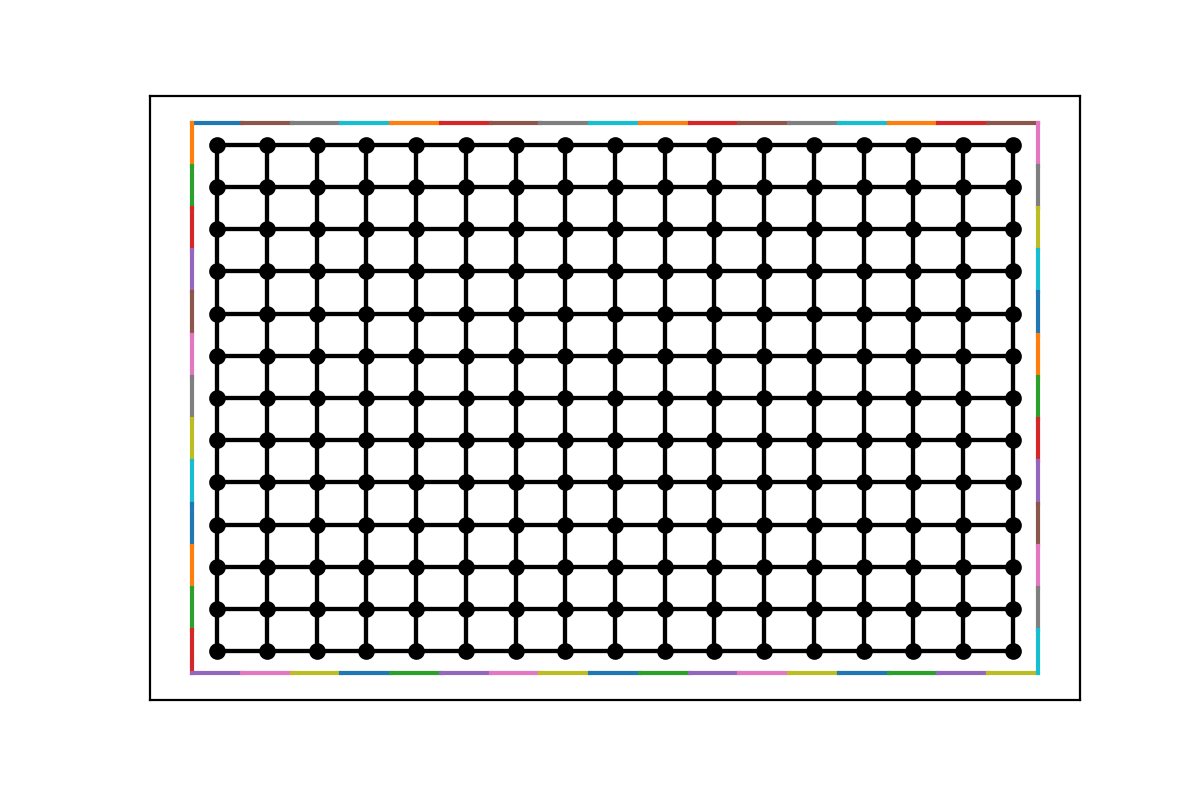

In [4]:
open("data/docs/17x13_full.png")

#### Question 1.3.

On applique simplement la formule pour $m=1$:

$M = n(m-1)+m(n-1) = n\times(1 - 1)+ 1\times (n-1) = n\times 0 + 1\times(n-1) = n-1$

On sait alors que le nombre d'emplacements de murs dans un pseudo-labyrinthe de $n\times 1$ cases est $n-1$.

Chaque emplacement peut contenir ou non un mur. Donc le nombre de pseudo-labyrinthes de taille $n\times 1$ est $2^{n-1}$

#### Question 1.4.

On applique simplement la formule pour $n=2$ et $m=3$:

$M = n(m-1)+m(n-1) = 2\times(3 - 1)+ 3\times (2-1) = 2\times 2 + 3\times 1 = 7$

On sait alors que le nombre d'emplacements de murs dans un pseudo-labyrinthe de $2\times 3$ cases est $7$.

Chaque emplacement peut contenir ou non un mur. 

Donc le nombre de pseudo-labyrinthes de taille $2\times 3$ est $2^{7} = 128$

<img src = "data/3x2/TotalSmall.png"/>

#### Question 1.5.

<img src="data/docs/3x2true.png"/>

#### Question 1.6.

On remarque que tous les labyrinthes de taille $3\times 2$ (resp. $2\times 3$) ont deux murs.

#### Question 1.7.


Pour qu'un pseudo-labyrinthe soit un labyrinthe, il suffit :

- Qu’il soit connexe
- Que l'ajout d'un mur lui fasse perdre sa connexité

<br>
    Il est trivial qu'il existe un chemin entre c et la sortie, car autrement le labyrinthe ne serait pas connexe. 

On suppose par l'absurde qu'il existe deux chemins entre c et la sortie: 
 
 - En fermant un des deux chemins, on peut encore passer de c à la sortie en prenant le deuxième chemin.

 - De plus, en partant des cellules antérieures a c ou situées sur le premier chemin,
   on peut joindre la sortie en rejoignant c et en prenant le second chemin.

   Donc le labyrinthe garde sa connexité $\implies$ contradiction.
 
Nous avons ainsi prouve l'existence et l'unicité du chemin.

#### Question 1.8.


Démonstration optionelle :

Soit L un labyrinthe. On peut alors le déplier en arbre ramifiée, dont chaque ramification est connectée par une seule cellule a la chaine principale. 

Étant donnée un rameau, on le détache, puis on l'ajoute à l'extrémité du tronc, sans changement du nombre de murs. 

Clairement le nombre de bordures sans murs est $(n\times m) - 1$ car le nombre totale de cellules est $(n\times m)$

Toutefois, un pseudo-labyrinthe possédant le bon nombre de murs n'est pas forcément un labyrinthe.

Par contre-exemple:
<div style="text-align: center;">
    <img src="data/3x2/66.png" style="float: "/>
</div>

Pour qu'un pseudo-labyrinthe soit un vrai labyrinthe, 
 
- il est nécessaire qu'il ait le bon nombre de murs,
 
- et il est suffisant qu'il soit de plus connexe.


## 2.  Modélisation et exploration

### Questions

<img src="data/docs/SujetP2.jpeg">

### Réponses


#### 2.1 Modelisation et visualisation

##### 2.1.1

In [5]:
from treatment import encodeLab, decodeLab

#Exemple de structure de donnée représentant un labyrinthe
rep1 = {
    "nlines"  :3,
    "ncolumns":4,
    (0,0):[(1,0)      ], (0,1):[(1,1),(0,2)], (0,2):[(0,1),(0,3)], (0,3):[(0,2),(1,3)       ],
    (1,0):[(0,0),(2,0)], (1,1):[(0,1),(1,2)], (1,2):[(1,1),(1,3)], (1,3):[(1,2),(0,3), (2,3)],
    (2,0):[(1,0),(2,1)], (2,1):[(2,0),(2,2)], (2,2):[(2,1),(2,3)], (2,3):[(2,2),(1,3)       ]
}

#prototype de representation: inutilisee
rep2 = decodeLab(rep1)

In [6]:
# representation binaire des murs et des colonnes
# utilisee implicitement

##### 2.1.2

In [7]:
O(3mn-m-n)

SyntaxError: invalid syntax (2214651440.py, line 1)

##### 2.1.3

#### 2.2 Generation aleatoire

##### 2.2.1

##### 2.2.2

##### 2.2.3

#### 2.3 Enumeration

##### 2.3.1

##### 2.3.2

##### 2.3.3

##### 2.3.4

##### 2.3.5

##### 2.3.6

#### 2.4  D’autres directions

## Conclusion